In [33]:
from natsort import natsorted
from glob import glob
import scipy.io as scio
import math
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from multiprocessing import Pool
from PIL import Image
from skimage.exposure import rescale_intensity
from functools import partial

In [34]:
mat_paths = natsorted(glob(f"*/*.mat"))

In [35]:
mat_paths = [mat_path for mat_path in mat_paths if "normalized" not in mat_path]

In [36]:
list(enumerate(mat_paths))

[(0, 'benign/RP059_paL_after_DL.mat'),
 (1, 'benign/RP060_left_after_DL.mat'),
 (2, 'benign/RP061_right_after_DL.mat'),
 (3, 'benign/RP062_left_after_DL.mat'),
 (4, 'benign/RP063_right_after_DL.mat'),
 (5, 'benign/RP065_right_after_DL.mat'),
 (6, 'benign/RP067_right_after_DL.mat'),
 (7, 'benign/RP068_left_front_after_DL.mat'),
 (8, 'benign/RP069_left_after_DL.mat'),
 (9, 'benign/RP070_right_after_DL.mat'),
 (10, 'benign/RP071_right_after_DL.mat'),
 (11, 'benign/RP074_left_after_DL.mat'),
 (12, 'benign/RP075_right_after_DL.mat'),
 (13, 'benign/RP076_left_after_DL.mat'),
 (14, 'benign/RP077_right_after_DL.mat'),
 (15, 'benign/RP078_right_after_DL.mat'),
 (16, 'benign/RP079_right_after_DL.mat'),
 (17, 'benign/RP080_left_after_DL.mat'),
 (18, 'benign/RP081_right_after_DL.mat'),
 (19, 'benign/RP084_left_after_DL.mat'),
 (20, 'benign/RP085_right_after_DL.mat'),
 (21, 'benign/RP086_right_after_DL.mat'),
 (22, 'benign/RP087_right_after_DL.mat'),
 (23, 'benign/RP088_left_after_DL.mat'),
 (24, '

In [37]:
# max_val = -math.inf
# min_val = math.inf

In [38]:
# def find_min_max(mat_path):
#     mat_data = scio.loadmat(mat_path)
#     mat_arr = mat_data["d"]
#     return mat_arr[:].min(), mat_arr[:].max()

In [39]:
# with Pool() as pool:
#     results = list(tqdm(pool.imap(find_min_max, mat_paths), total=len(mat_paths)))

# min_val = min(result[0] for result in results)
# max_val = max(result[1] for result in results)


In [40]:
# min_val, max_val

In [41]:
# def save_map_global(mat_path):
#     mat_data = scio.loadmat(mat_path)
#     mat_arr = mat_data["d"]
#     label = mat_path.split("/")[0]
#     filename = os.path.basename(mat_path).replace('.mat', '_normalized.mat')
#     scio.savemat(f"MAP_mats_globalnorm/{filename}", {"frame": (np.max(((mat_arr-min_val)/(max_val-min_val)), 0)*255).astype(np.uint8), "label": label})
#     return

In [42]:
# with Pool() as pool:
#     results = list(tqdm(pool.imap(save_map_global, mat_paths), total=len(mat_paths)))

In [43]:
# def save_map_local(mat_path):
#     mat_data = scio.loadmat(mat_path)
#     mat_arr = mat_data["d"]
#     label = mat_path.split("/")[0]
#     filename = os.path.basename(mat_path).replace('.mat', '_normalized.mat')
#     scio.savemat(f"MAP_mats_localnorm/{filename}", {"frame": rescale_intensity(np.max(mat_arr, 0), out_range=(0,255)).astype(np.uint8), "label": label})
#     return

In [44]:
# def save_map_cmap_local(mat_path, cmap="turbo",split="train",square=False):
#     mat_data = scio.loadmat(mat_path)
#     mat_arr = mat_data["d"]
#     label = mat_path.split("/")[0]
    
#     mat_norm = rescale_intensity(mat_arr, out_range=(0,1))
#     cmap = plt.get_cmap(cmap)
    
#     if square:
#         mat_enc = cmap(mat_norm**2)[...,:3]
#     else:
#         mat_enc = cmap(mat_norm)[...,:3]
        
#     frame = rescale_intensity(np.max(mat_enc, 0), out_range=(0,255)).astype(np.uint8)
#     frame_img = Image.fromarray(frame)
    
#     filename = os.path.basename(mat_path).replace('.mat', '.png')
    
#     if square:
#         frame_img.save(f"MAP_pngs_sq_enc/{split}/{label}/{filename}")
#     else:
#         frame_img.save(f"MAP_pngs_enc/{split}/{label}/{filename}")
#     return

In [45]:
benign_paths = [mat_path for mat_path in mat_paths if "benign" in mat_path]

In [46]:
malignant_paths = [mat_path for mat_path in mat_paths if "malignant" in mat_path]

In [47]:
len(benign_paths)

78

In [48]:
len(malignant_paths)

78

In [49]:
class_sample_count = len(malignant_paths)

In [50]:
train_count = int(class_sample_count * 0.6)
val_count = int(class_sample_count * 0.1)
test_count = class_sample_count - (train_count + val_count)

In [51]:
train_count, val_count, test_count, train_count + val_count + test_count

(46, 7, 25, 78)

In [52]:
# for path_list in [benign_paths, malignant_paths]:
#     with Pool(12) as pool:
#         results = list(tqdm(pool.imap(save_map_cmap_local, path_list[:train_count]), total=len(path_list[:train_count])))

In [53]:
# val_fn = partial(save_map_cmap_local, split="val")

In [54]:
# for path_list in [benign_paths, malignant_paths]:
#     with Pool(12) as pool:
#         results = list(tqdm(pool.imap(val_fn, path_list[train_count:]), total=len(path_list[train_count:])))

In [55]:
# sq_fn = partial(save_map_cmap_local, square=True)

In [56]:
# for path_list in [benign_paths, malignant_paths]:
#     with Pool(12) as pool:
#         results = list(tqdm(pool.imap(sq_fn, path_list[:train_count]), total=len(path_list[:train_count])))

In [57]:
# sq_val_fn = partial(save_map_cmap_local, square=True, split="val")

In [58]:
# for path_list in [benign_paths, malignant_paths]:
#     with Pool(12) as pool:
#         results = list(tqdm(pool.imap(sq_val_fn, path_list[train_count:]), total=len(path_list[train_count:])))

### Depth Encoding

In [59]:
mat_path = mat_paths[0]

In [60]:
mat_data = scio.loadmat(mat_path)
mat_arr = mat_data["d"]
label = mat_path.split("/")[0]

In [61]:
map_range = (0.0, 1.0)
depth_range = [1, mat_arr.shape[0]]
cmap = plt.cm.jet

# data3 = medfilt2(data3,[3 3]) #smooth the data
data3 = np.max(mat_arr, axis=0)
idx = np.argmax(mat_arr, axis=0)
data3 = np.squeeze(data3)
idx = np.squeeze(idx)

# idx = max(idx(:))-idx+1    #convert idx into depth, depending on the scanning direction
idx = (np.max(idx) - idx + 1) * (cmap.N / np.max(idx))

data3 = data3 / np.max(data3) * 3  # normalize the MAP data
data3[data3 < 0] = 0
data4 = rescale_intensity(data3, in_range=map_range)

depth_RGB = cmap(idx.astype(int))  # Convert idx to int for indexing
map_RGB = np.repeat(data4[:, :, np.newaxis], 3, axis=2)
depth_RGB2 = depth_RGB[...,:3] * map_RGB

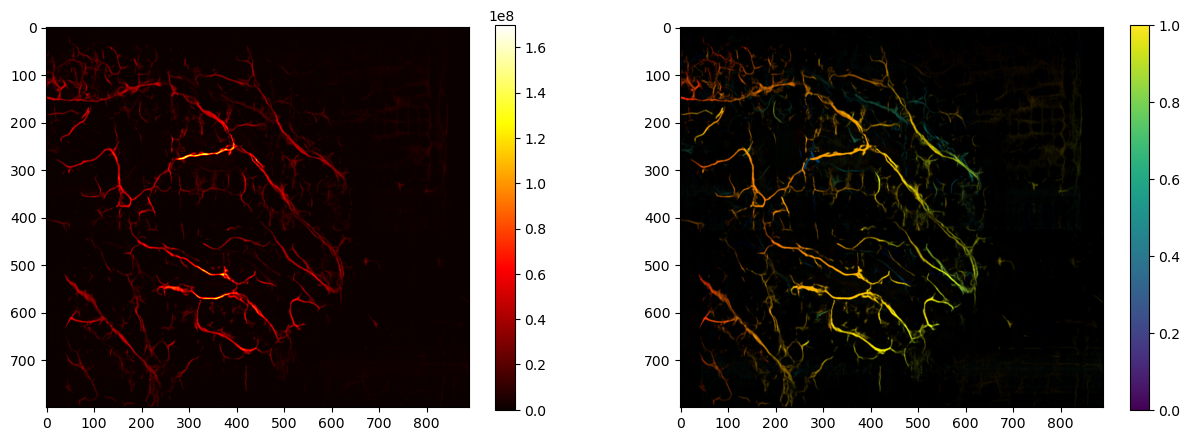

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.max(mat_arr, 0), "hot")
plt.colorbar()
plt.subplot(122)
plt.imshow(depth_RGB2)
plt.colorbar()

In [64]:
# WITH AUG

# def depth_encode(mat_path, split="train", square=False):
#     mat_data = scio.loadmat(mat_path)
#     mat_arr = mat_data["d"]
#     label = mat_path.split("/")[0]
    
#     map_range = (0.0, 1.0)
#     depth_range = [1, mat_arr.shape[0]]
#     cmap = plt.cm.jet
    
#     data3 = np.max(mat_arr, axis=0)
#     idx = np.argmax(mat_arr, axis=0)
#     data3 = np.squeeze(data3)
#     idx = np.squeeze(idx)
#     idx = (np.max(idx) - idx + 1) * (cmap.N / np.max(idx))
#     data3 = np.clip(data3 / np.max(data3) * 3, 0, None)
#     data4 = rescale_intensity(data3, in_range=map_range)
#     depth_RGB = cmap(idx.astype(int))
#     map_RGB = np.repeat(data4[:, :, np.newaxis], 3, axis=2)
#     depth_RGB2 = depth_RGB[..., :3] * map_RGB

#     if square:
#         depth_RGB2 = depth_RGB2**2
        
#     frame = (depth_RGB2*255).astype(np.uint8)
#     frame_img = Image.fromarray(frame)

#     # augment and save all generated frames including original
#     # rot 90
#     # rot 180
#     # rot  270
#     # flip horizontal
#     # flip vertical
#     # warp along horizontal to simulate flattening of the breast
#     # warp along vertical to simulate stretching of the breast
#     # warp both

#     frame_rot90 = frame_img.rotate(90)
#     frame_rot180 = frame_img.rotate(180)
#     frame_rot270 = frame_img.rotate(270)
#     frame_flip_h = frame_img.transpose(Image.FLIP_LEFT_RIGHT)
#     frame_flip_v = frame_img.transpose(Image.FLIP_TOP_BOTTOM)
#     # frame_warp_h = frame_img.transform(frame_img.size, Image.AFFINE, (1, 0, 0, 0, 1, 0.1))
#     # frame_warp_v = frame_img.transform(frame_img.size, Image.AFFINE, (1, 0, 0, 0.1, 1, 0))
#     # frame_warp_hv = frame_img.transform(frame_img.size, Image.AFFINE, (1, 0, 0, 0.1, 1, 0.1))

#     filename = os.path.basename(mat_path).replace('.mat', '.png')

    
#     #mkdir if doesnt exist
#     if not os.path.exists(f"MAP_pngs_DEPTH_aug/{split}/{label}"):
#         os.makedirs(f"MAP_pngs_DEPTH_aug/{split}/{label}")
#     if not os.path.exists(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}"):
#         os.makedirs(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}")

#     if square:
#         frame_img.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/original_{filename}")
#         frame_rot90.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/rot90_{filename}")
#         frame_rot180.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/rot180_{filename}")
#         frame_rot270.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/rot270_{filename}")
#         frame_flip_h.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/flip_h_{filename}")
#         frame_flip_v.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/flip_v_{filename}")
#         # frame_warp_h.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/warp_h_{filename}")
#         # frame_warp_v.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/warp_v_{filename}")
#         # frame_warp_hv.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/warp_hv_{filename}")
#     else:
#         frame_img.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/original_{filename}")
#         frame_rot90.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/rot90_{filename}")
#         frame_rot180.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/rot180_{filename}")
#         frame_rot270.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/rot270_{filename}")
#         frame_flip_h.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/flip_h_{filename}")
#         frame_flip_v.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/flip_v_{filename}")
#         # frame_warp_h.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/warp_h_{filename}")
#         # frame_warp_v.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/warp_v_{filename}")
#         # frame_warp_hv.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/warp_hv_{filename}")

#     return

In [81]:
# def depth_encode(mat_path, split="train", square=False):
#     mat_data = scio.loadmat(mat_path)
#     mat_arr = mat_data["d"]
#     label = mat_path.split("/")[0]
    
#     map_range = (0.0, 1.0)
#     depth_range = [1, mat_arr.shape[0]]
#     cmap = plt.cm.jet
    
#     data3 = np.max(mat_arr, axis=0)
#     idx = np.argmax(mat_arr, axis=0)
#     data3 = np.squeeze(data3)
#     idx = np.squeeze(idx)
#     idx = (np.max(idx) - idx + 1) * (cmap.N / np.max(idx))
#     data3 = np.clip(data3 / np.max(data3) * 3, 0, None)
#     data4 = rescale_intensity(data3, in_range=map_range)
#     depth_RGB = cmap(idx.astype(int))
#     map_RGB = np.repeat(data4[:, :, np.newaxis], 3, axis=2)
#     depth_RGB2 = depth_RGB[..., :3] * map_RGB

#     if square:
#         depth_RGB2 = depth_RGB2**2
        
#     frame = (depth_RGB2*255).astype(np.uint8)
#     frame_img = Image.fromarray(frame)

#     # augment and save all generated frames including original
#     # rot 90
#     # rot 180
#     # rot  270
#     # flip horizontal
#     # flip vertical
#     # warp along horizontal to simulate flattening of the breast
#     # warp along vertical to simulate stretching of the breast
#     # warp both

#     frame_rot90 = frame_img.rotate(90)
#     frame_rot180 = frame_img.rotate(180)
#     frame_rot270 = frame_img.rotate(270)
#     frame_flip_h = frame_img.transpose(Image.FLIP_LEFT_RIGHT)
#     frame_flip_v = frame_img.transpose(Image.FLIP_TOP_BOTTOM)
#     # frame_warp_h = frame_img.transform(frame_img.size, Image.AFFINE, (1, 0, 0, 0, 1, 0.1))
#     # frame_warp_v = frame_img.transform(frame_img.size, Image.AFFINE, (1, 0, 0, 0.1, 1, 0))
#     # frame_warp_hv = frame_img.transform(frame_img.size, Image.AFFINE, (1, 0, 0, 0.1, 1, 0.1))

#     filename = os.path.basename(mat_path).replace('.mat', '.png')

    
#     #mkdir if doesnt exist
#     if not os.path.exists(f"MAP_pngs_DEPTH_aug/{split}/{label}"):
#         os.makedirs(f"MAP_pngs_DEPTH_aug/{split}/{label}")
#     if not os.path.exists(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}"):
#         os.makedirs(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}")

#     if square:
#         frame_img.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/original_{filename}")
#         frame_rot90.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/rot90_{filename}")
#         frame_rot180.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/rot180_{filename}")
#         frame_rot270.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/rot270_{filename}")
#         frame_flip_h.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/flip_h_{filename}")
#         frame_flip_v.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/flip_v_{filename}")
#         # frame_warp_h.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/warp_h_{filename}")
#         # frame_warp_v.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/warp_v_{filename}")
#         # frame_warp_hv.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/warp_hv_{filename}")
#     else:
#         frame_img.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/original_{filename}")
#         frame_rot90.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/rot90_{filename}")
#         frame_rot180.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/rot180_{filename}")
#         frame_rot270.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/rot270_{filename}")
#         frame_flip_h.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/flip_h_{filename}")
#         frame_flip_v.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/flip_v_{filename}")
#         # frame_warp_h.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/warp_h_{filename}")
#         # frame_warp_v.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/warp_v_{filename}")
#         # frame_warp_hv.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/warp_hv_{filename}")

#     return

In [ ]:
def depth_encode(mat_path, split="train", square=False):
    mat_data = scio.loadmat(mat_path)
    mat_arr = mat_data["d"]
    label = mat_path.split("/")[0]
    
    map_range = (0.0, 1.0)
    depth_range = [1, mat_arr.shape[0]]
    cmap = plt.cm.jet
    
    data3 = np.max(mat_arr, axis=0)
    idx = np.argmax(mat_arr, axis=0)
    data3 = np.squeeze(data3)
    idx = np.squeeze(idx)
    idx = (np.max(idx) - idx + 1) * (cmap.N / np.max(idx))
    data3 = np.clip(data3 / np.max(data3) * 3, 0, None)
    data4 = rescale_intensity(data3, in_range=map_range)
    depth_RGB = cmap(idx.astype(int))
    map_RGB = np.repeat(data4[:, :, np.newaxis], 3, axis=2)
    depth_RGB2 = depth_RGB[..., :3] * map_RGB

    if square:
        depth_RGB2 = depth_RGB2**2
        
    frame = (depth_RGB2*255).astype(np.uint8)
    frame_img = Image.fromarray(frame)

    # augment and save all generated frames including original
    # rot 90
    # rot 180
    # rot  270
    # flip horizontal
    # flip vertical
    # warp along horizontal to simulate flattening of the breast
    # warp along vertical to simulate stretching of the breast
    # warp both

    # frame_rot90 = frame_img.rotate(90)
    # frame_rot180 = frame_img.rotate(180)
    # frame_rot270 = frame_img.rotate(270)
    # frame_flip_h = frame_img.transpose(Image.FLIP_LEFT_RIGHT)
    # frame_flip_v = frame_img.transpose(Image.FLIP_TOP_BOTTOM)
    # # frame_warp_h = frame_img.transform(frame_img.size, Image.AFFINE, (1, 0, 0, 0, 1, 0.1))
    # # frame_warp_v = frame_img.transform(frame_img.size, Image.AFFINE, (1, 0, 0, 0.1, 1, 0))
    # # frame_warp_hv = frame_img.transform(frame_img.size, Image.AFFINE, (1, 0, 0, 0.1, 1, 0.1))

    filename = os.path.basename(mat_path).replace('.mat', '.png')

    
    #mkdir if doesnt exist
    if not os.path.exists(f"MAP_pngs_DEPTH_aug/{split}/{label}"):
        os.makedirs(f"MAP_pngs_DEPTH_aug/{split}/{label}")
    if not os.path.exists(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}"):
        os.makedirs(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}")

    if square:
        frame_img.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/{filename}")
        # frame_rot90.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/rot90_{filename}")
        # frame_rot180.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/rot180_{filename}")
        # frame_rot270.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/rot270_{filename}")
        # frame_flip_h.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/flip_h_{filename}")
        # frame_flip_v.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/flip_v_{filename}")
        # # frame_warp_h.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/warp_h_{filename}")
        # # frame_warp_v.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/warp_v_{filename}")
        # # frame_warp_hv.save(f"MAP_pngs_DEPTH_sq_aug/{split}/{label}/warp_hv_{filename}")
    else:
        frame_img.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/{filename}")
        # frame_rot90.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/rot90_{filename}")
        # frame_rot180.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/rot180_{filename}")
        # frame_rot270.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/rot270_{filename}")
        # frame_flip_h.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/flip_h_{filename}")
        # frame_flip_v.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/flip_v_{filename}")
        # # frame_warp_h.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/warp_h_{filename}")
        # # frame_warp_v.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/warp_v_{filename}")
        # # frame_warp_hv.save(f"MAP_pngs_DEPTH_aug/{split}/{label}/warp_hv_{filename}")

    return

In [66]:
# save_map_cmap_local(mat_paths[0])

In [67]:
# with Pool() as pool:
#     results = list(tqdm(pool.imap(save_map_local, mat_paths), total=len(mat_paths)))

In [68]:
# vol_count = len(map_mat_paths)

In [69]:
# vol_count

In [70]:
# train_count = int(vol_count*0.7)

In [71]:
# train_count

In [72]:
# test_count = vol_count-train_count

In [73]:
# test_count

In [74]:
# map_mat_paths = natsorted(glob(f"MAP_mats_localnorm/*.mat"))

In [75]:
# train_paths = map_mat_paths[:train_count]
# test_paths = map_mat_paths[train_count:]

In [76]:
# for path in tqdm(train_paths):
#     pid = path.split("/")[1].split("_")[0]
#     map_mat_data = scio.loadmat(path)
#     map_mat_arr = map_mat_data["frame"]
#     map_mat_label = map_mat_data["label"][0]
#     map_img = Image.fromarray(map_mat_arr)

#     i = 0
#     filename = f"MAP_pngs_localnorm/train/{map_mat_label}/{pid}_{i}.png"
    
#     while True:
#         if os.path.exists(filename):
#             i+=1
#             filename = f"MAP_pngs_localnorm/train/{map_mat_label}/{pid}_{i}.png"
#         else:
#             break
    
#     map_img.save(filename)

In [77]:
# for path in tqdm(test_paths):
#     pid = path.split("/")[1].split("_")[0]
#     map_mat_data = scio.loadmat(path)
#     map_mat_arr = map_mat_data["frame"]
#     map_mat_label = map_mat_data["label"][0]
#     map_img = Image.fromarray(map_mat_arr)

#     i = 0
#     filename = f"MAP_pngs_localnorm/val/{map_mat_label}/{pid}_{i}.png"
    
#     while True:
#         if os.path.exists(filename):
#             i+=1
#             filename = f"MAP_pngs_localnorm/val/{map_mat_label}/{pid}_{i}.png"
#         else:
#             break
    
#     map_img.save(filename)

In [78]:
# with Pool(12) as pool:
#     results = list(tqdm(pool.imap(save_map_cmap_local, mat_paths), total=len(mat_paths)))

In [79]:
val_fn = partial(depth_encode, split="val")
test_fn = partial(depth_encode, split="test")
sq_fn = partial(depth_encode, square=True)
sq_val_fn = partial(depth_encode, split="val", square=True)
sq_test_fn = partial(depth_encode, split="test", square=True)

In [80]:
with Pool(10) as pool:
        results = list(tqdm(pool.imap(depth_encode, benign_paths[:train_count]), total=len(benign_paths[:train_count])))
        results = list(tqdm(pool.imap(val_fn, benign_paths[train_count:train_count+val_count]), total=len(benign_paths[train_count:train_count+val_count])))
        results = list(tqdm(pool.imap(test_fn, benign_paths[train_count+val_count:]), total=len(benign_paths[train_count+val_count:])))

        results = list(tqdm(pool.imap(sq_fn, benign_paths[:train_count]), total=len(benign_paths[:train_count])))
        results = list(tqdm(pool.imap(sq_val_fn, benign_paths[train_count:train_count+val_count]), total=len(benign_paths[train_count:train_count+val_count])))
        results = list(tqdm(pool.imap(sq_test_fn, benign_paths[train_count+val_count:]), total=len(benign_paths[train_count+val_count:])))

        results = list(tqdm(pool.imap(depth_encode, malignant_paths[:train_count]), total=len(malignant_paths[:train_count])))
        results = list(tqdm(pool.imap(val_fn, malignant_paths[train_count:train_count+val_count]), total=len(malignant_paths[train_count:train_count+val_count])))
        results = list(tqdm(pool.imap(test_fn, malignant_paths[train_count+val_count:]), total=len(malignant_paths[train_count+val_count:])))

        results = list(tqdm(pool.imap(sq_fn, malignant_paths[:train_count]), total=len(malignant_paths[:train_count])))
        results = list(tqdm(pool.imap(sq_val_fn, malignant_paths[train_count:train_count+val_count]), total=len(malignant_paths[train_count:train_count+val_count])))
        results = list(tqdm(pool.imap(sq_test_fn, malignant_paths[train_count+val_count:]), total=len(malignant_paths[train_count+val_count:])))

  0%|          | 0/46 [00:00<?, ?it/s]

KeyboardInterrupt: 